# Exporatory Data Analysis pour mieux appréhender le dataset.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_row', 100)
pd.set_option('display.max_column', 100)
%pwd

 # FORME GENERALE DU DATASET :
(heatmap,drop de colonnes)

In [10]:
data=pd.read_excel('dataset.xlsx')
df=data.copy()
df.head(20)


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,...,Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [4]:
df.shape

(5644, 111)

<AxesSubplot:>

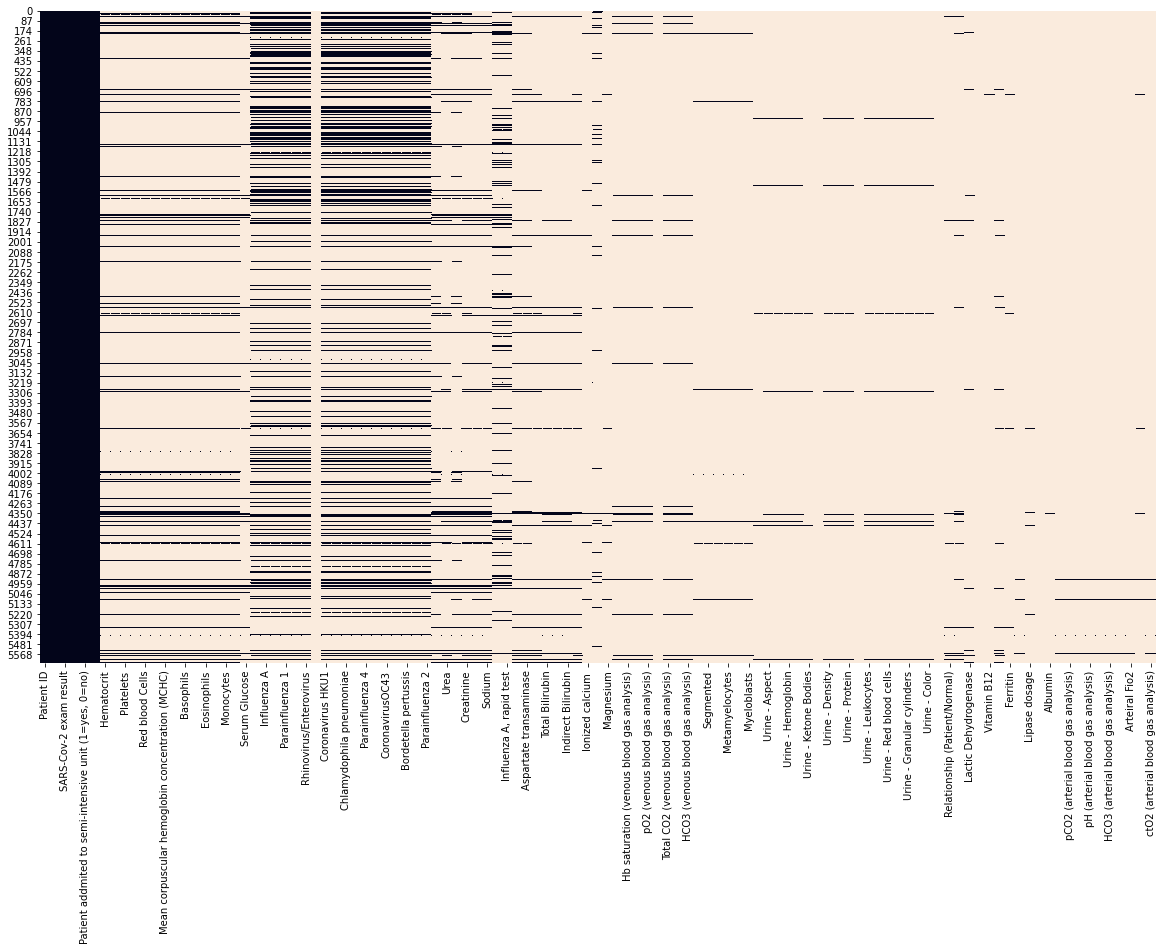

In [5]:
plt.figure(figsize=(20,12))
sns.heatmap(df.isna(),cbar=False)


<AxesSubplot:>

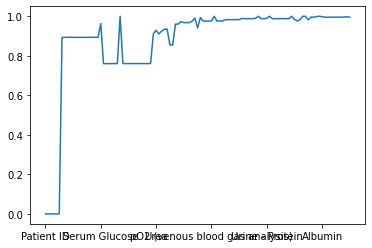

In [7]:
(df.isna().sum()/df.shape[0]).plot() #série pandas du pourcentage de NaN par colonne : nombreux!

In [11]:
#on supprime les colonnes avec plus de 90% de NaN, il en reste 35
index_bonnes_colonnes=df.columns[df.isna().sum()/df.shape[0] <0.9]

df=df[index_bonnes_colonnes]
df=df.drop('Patient ID',axis=1)#le nom est inutile
df=df.drop('Influenza A, rapid test',axis=1) #redondant avec une autre colonne
df=df.drop('Influenza B, rapid test',axis=1)
df=df.drop('Parainfluenza 2',axis=1)#vide
df.shape



(5644, 35)

<AxesSubplot:>

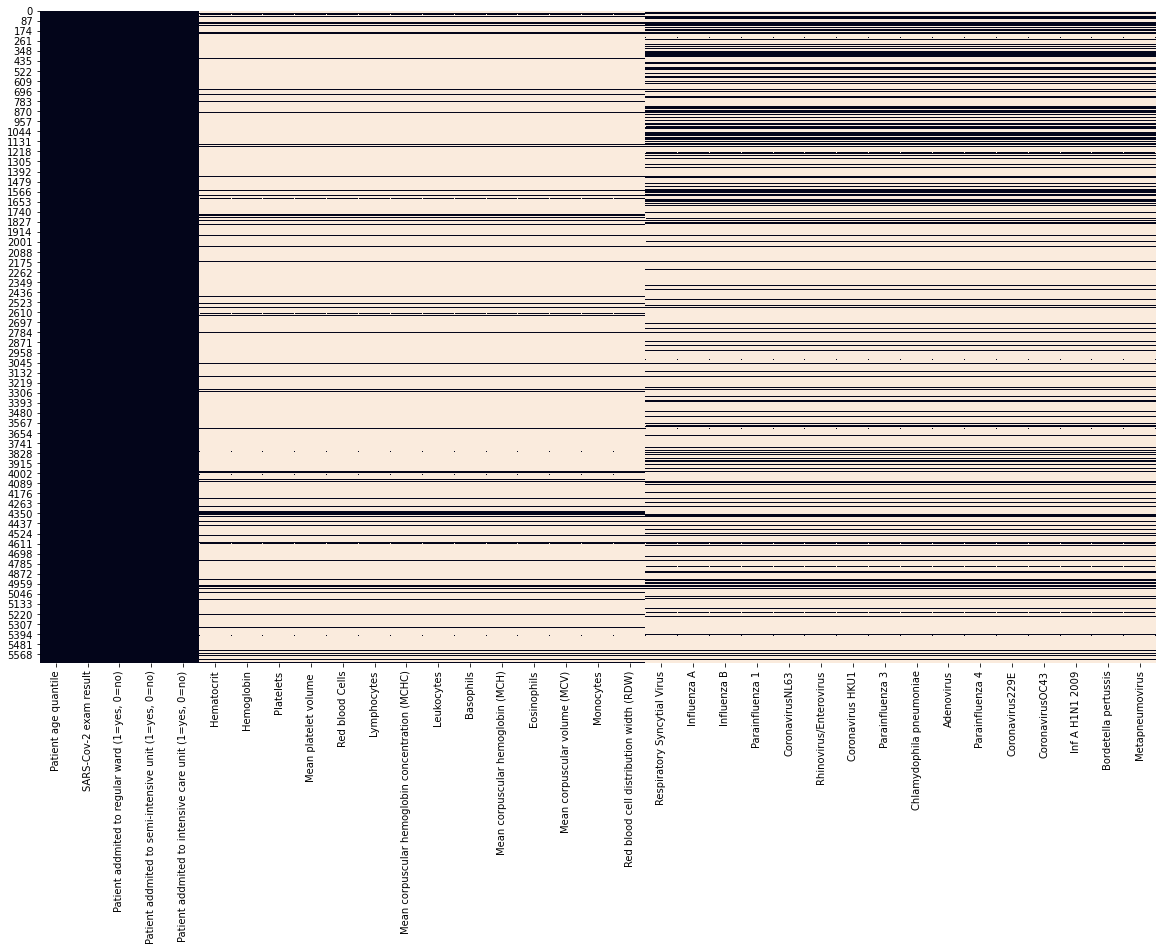

In [12]:
plt.figure(figsize=(20,12))
sns.heatmap(df.isna(),cbar=False)

In [15]:
df.dtypes.value_counts()

object     17
float64    14
int64       4
dtype: int64

# Répartition des résultats au test:
(value_counts())

<AxesSubplot:ylabel='SARS-Cov-2 exam result'>

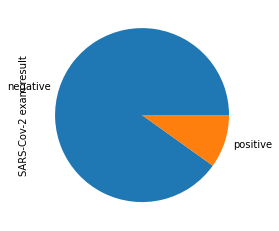

In [14]:
df['SARS-Cov-2 exam result'].value_counts().plot.pie()

# Etude de la distribution des features quantitatives:
(sns.distplot())

C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

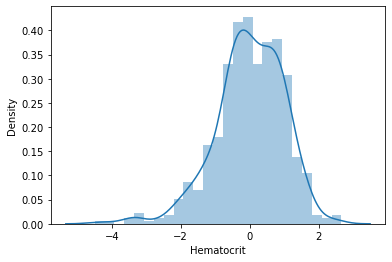

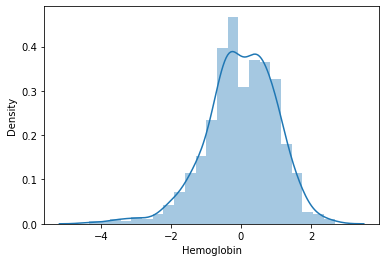

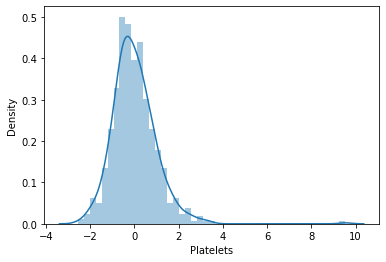

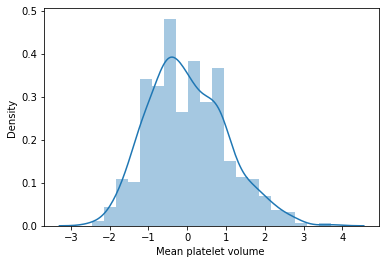

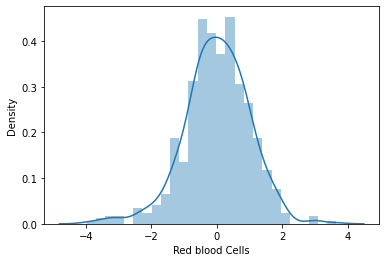

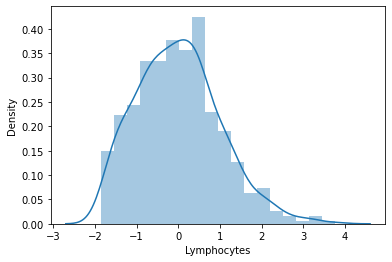

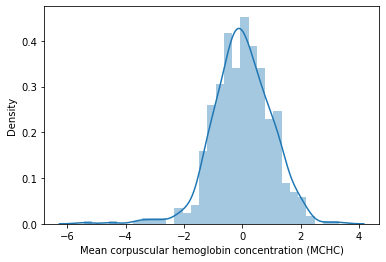

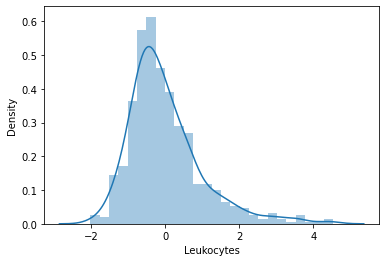

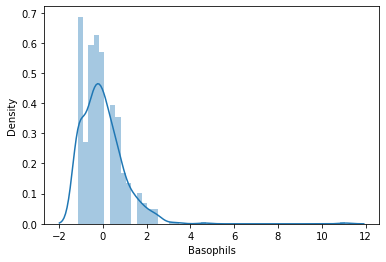

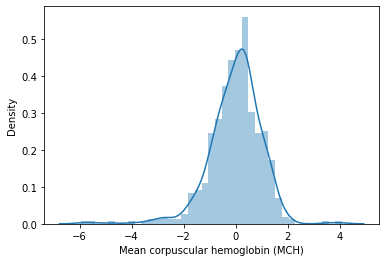

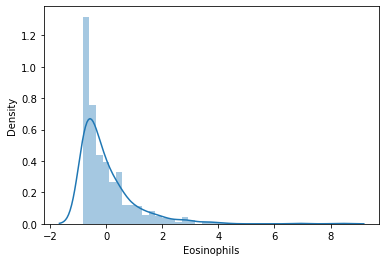

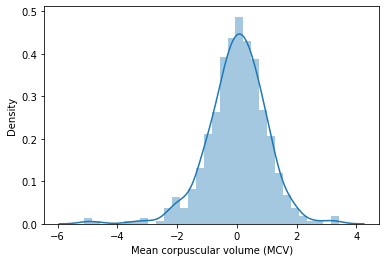

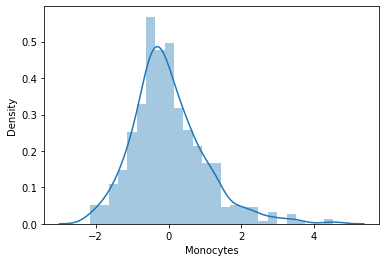

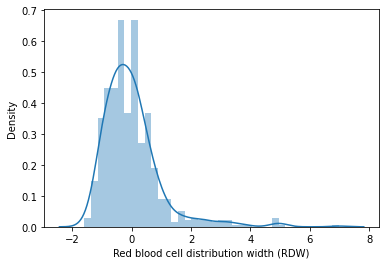

In [16]:
#features quantitatives : cherchons à mieux les comprendre.
#-> elles sont normalisées et suivent une distribution gaussienne.
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

# Etude des features qualitatives :
(value_counts())

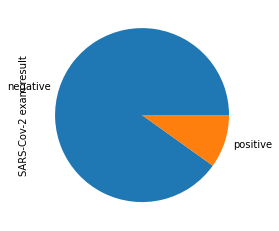

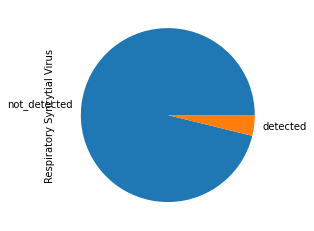

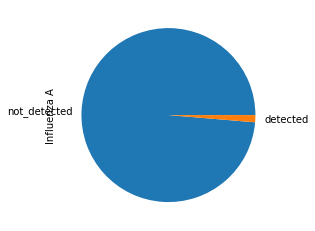

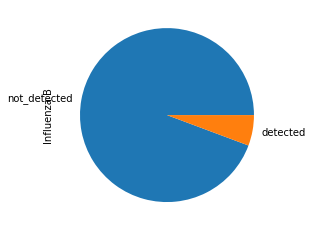

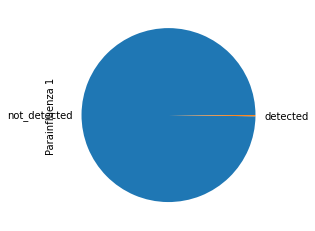

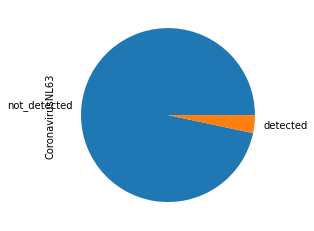

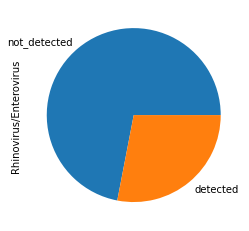

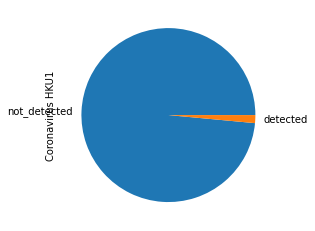

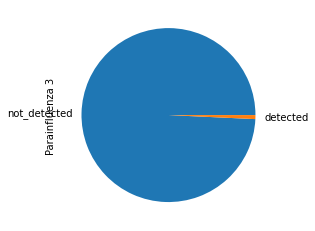

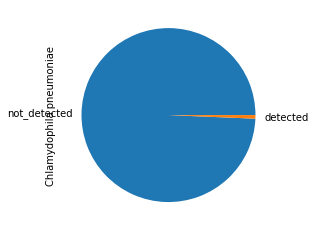

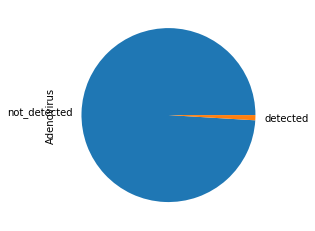

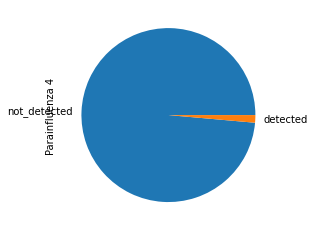

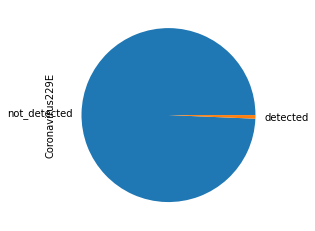

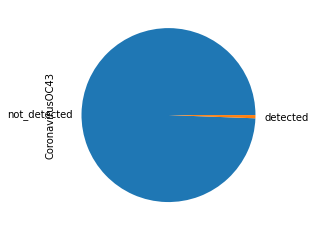

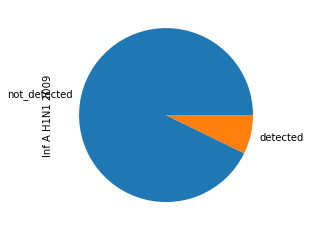

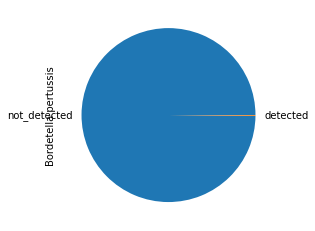

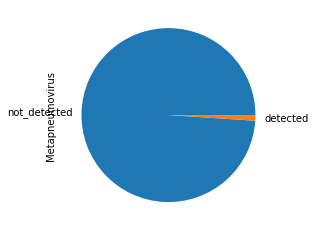

In [17]:
#features qualitatives : cherchons à mieux les comprendre (positivité faible sauf Rhino/Enthero)
for col in df.select_dtypes('object'):
   plt.figure()
   df[col].value_counts().plot.pie()

# ANALYSE DES RELATIONS TARGET / FEATURES


# On crée deux sous-groupes selon le résultat au test PCR
(boolean indexing sur df)

In [18]:
df_positive=df[df['SARS-Cov-2 exam result']=='positive']
df_negative=df[df['SARS-Cov-2 exam result']=='negative']


# On différencie les colonnes features qualitatifs et quantitatifs en deux groupes
(select_dtypes(' ') sur un dataframe)

In [19]:
blood_columns=df.select_dtypes('float')
viruses_columns=df.select_dtypes('object')


# Lien  target / âge :
(sns.countplot et son hue pour discriminer selon la classe positive ou negative)

<AxesSubplot:xlabel='Patient age quantile'>

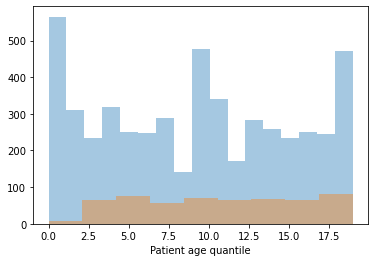

In [23]:
#Peu de positifs pour le premier quantile mais les quantiles n'ont pas été clairement définis...(?)
sns.distplot(df_negative['Patient age quantile'],kde=False)
sns.distplot(df_positive['Patient age quantile'],kde=False)


C:\Users\pierr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

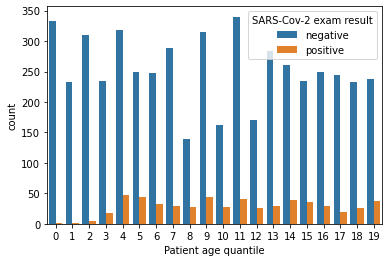

In [24]:
#meme chose avec un countplot et son hue
sns.countplot(df['Patient age quantile'],hue=df['SARS-Cov-2 exam result'],data=df)

# Lien target / blood :

C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

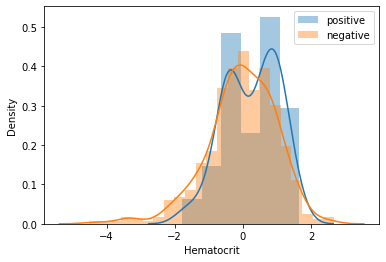

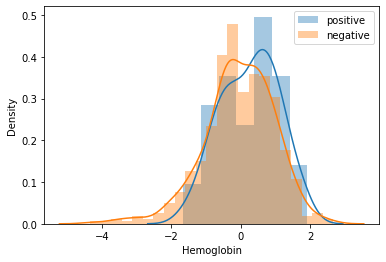

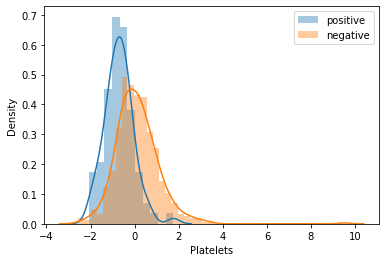

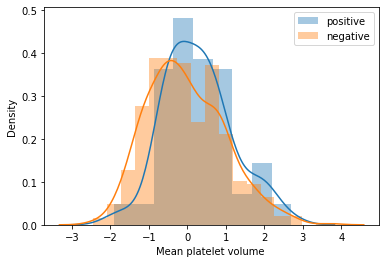

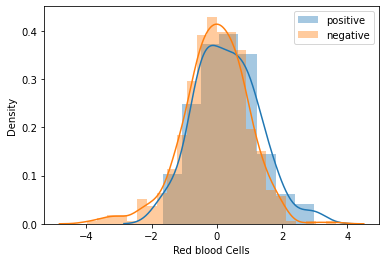

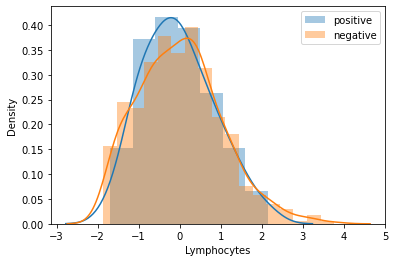

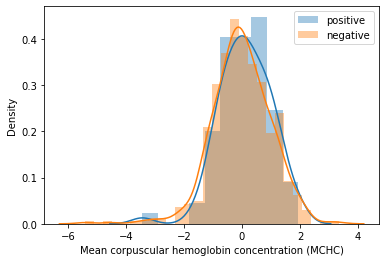

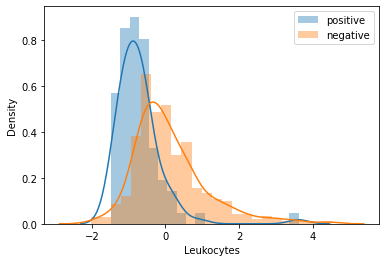

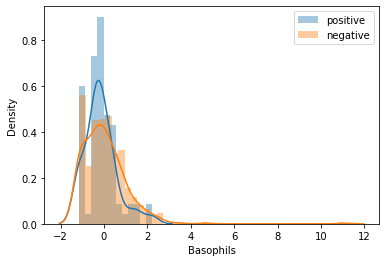

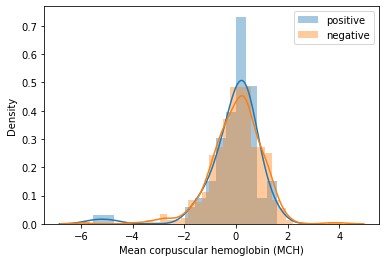

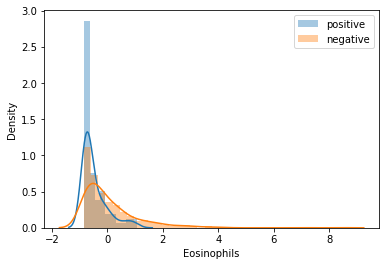

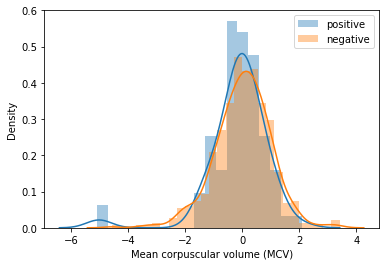

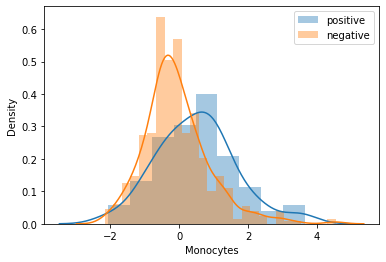

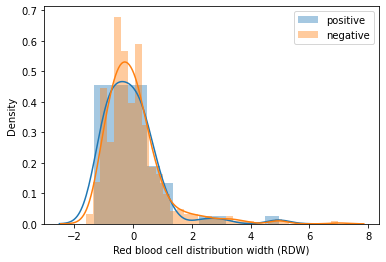

In [25]:
#FEATURES QUANTITATIVES :blood tests
#les platelets , monocytes et leucocytes semblent significativement différents.

for col in blood_columns:
    plt.figure()
    sns.distplot(df_positive[col], label='positive')
    sns.distplot(df_negative[col],label='negative')
    plt.legend()

# Lien target/viruses
(crosstabs
passés eventuellement dans une heatmap)

In [26]:
#FEATURES QUALITATIVES :virus test
#lien peu probant. (remarque: beaucoup d'entherovirus)

#un exemple de crosstab
pd.crosstab(df['SARS-Cov-2 exam result'],df['Influenza A'])

Influenza A,detected,not_detected
SARS-Cov-2 exam result,,
negative,18,1224
positive,0,112


In [27]:
#dur à lire
for col in viruses_columns:
    print(pd.crosstab(df['SARS-Cov-2 exam result'],df[col]))
    print('///////////////////////////')
    

SARS-Cov-2 exam result  negative  positive
SARS-Cov-2 exam result                    
negative                    5086         0
positive                       0       558
///////////////////////////
Respiratory Syncytial Virus  detected  not_detected
SARS-Cov-2 exam result                             
negative                           52          1190
positive                            0           112
///////////////////////////
Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112
///////////////////////////
Influenza B             detected  not_detected
SARS-Cov-2 exam result                        
negative                      74          1168
positive                       3           109
///////////////////////////
Parainfluenza 1         detected  not_detected
SARS-Cov-2 exam result                        
negative                       3      

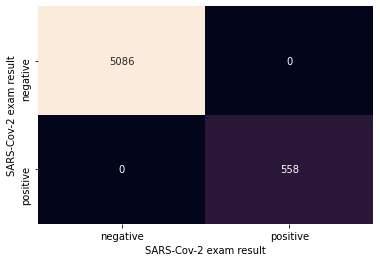

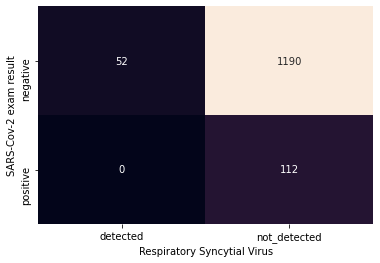

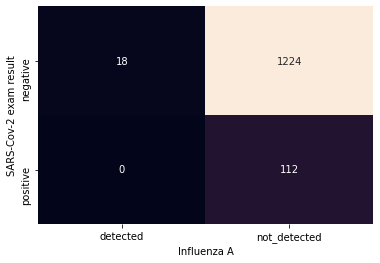

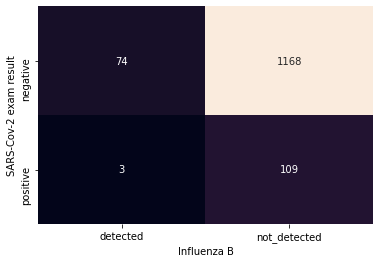

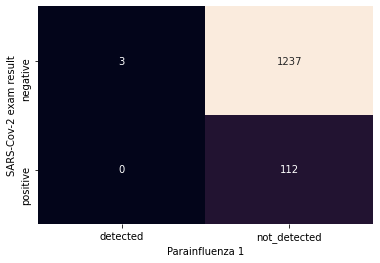

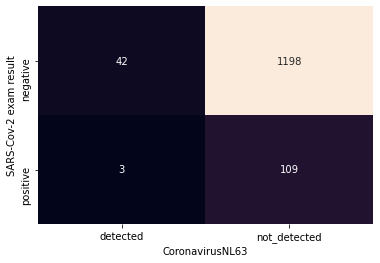

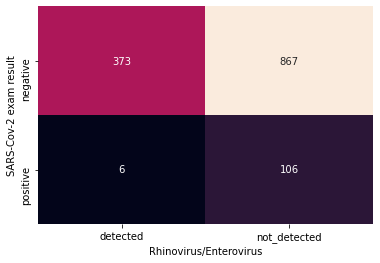

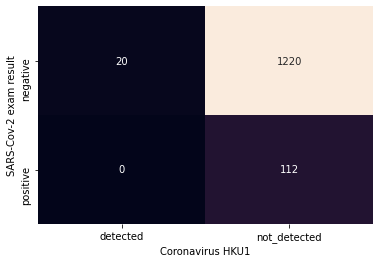

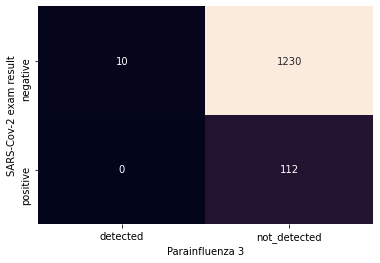

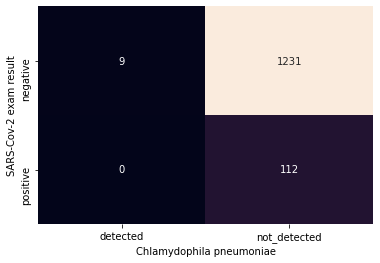

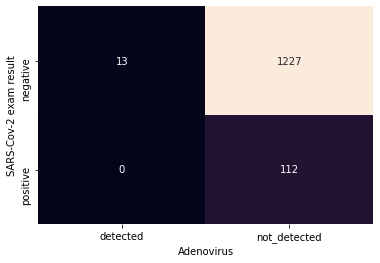

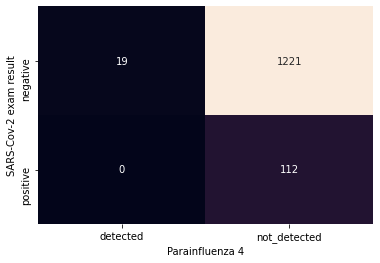

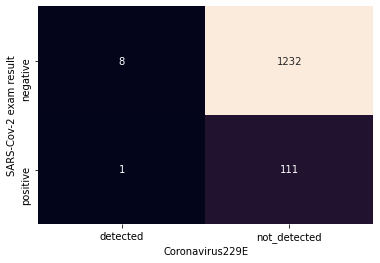

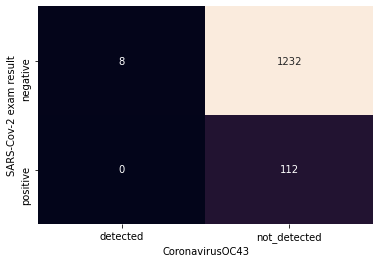

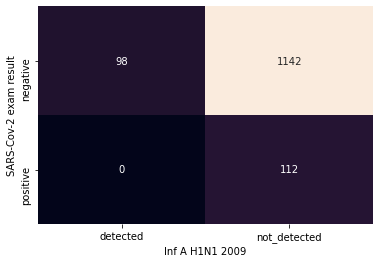

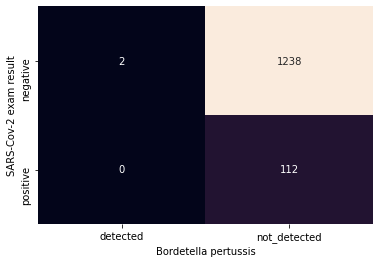

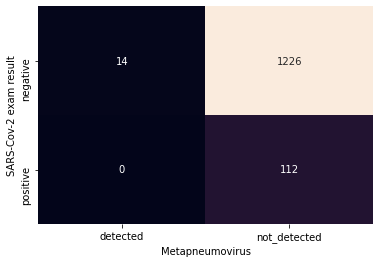

In [28]:
#plus lisible avec des heatmap

for col in viruses_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]),annot=True,cbar=False,fmt='d')

# -----------------------ne pas lire : essais personnels moins probants----------------------

# Feature engineering 'hospit' : plus adaptée que 3 colonnes distinctes pour visualiser et corréler.
(utilisation de apply
fonction crée qui reçoit un dataframe et renvoit le t(ype d'hospit (format "string") )


In [29]:
#on crée une feature hospit: surveillance/semi-intensif/intensif pour remplacer les trois colonnes d'entiers avec une map

def hospit(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)']==1:
        return 'maison'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)']==1:
        return 'semi'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)']==1:
        return 'intensif'
    else:
        return'indeterminé'


    

df['hospitalisation?']=df.apply(hospit,axis=1)
df=df.drop('Patient addmited to regular ward (1=yes, 0=no)',axis=1)
df=df.drop('Patient addmited to semi-intensive unit (1=yes, 0=no)',axis=1)       
df=df.drop('Patient addmited to intensive care unit (1=yes, 0=no)',axis=1)
df.shape


(5644, 33)

C:\Users\pierr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hospitalisation?', ylabel='count'>

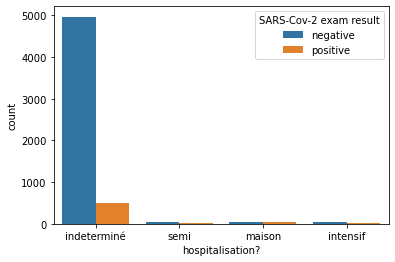

In [30]:
sns.countplot(df['hospitalisation?'],hue=df['SARS-Cov-2 exam result'],data=df)

# Optionnel : analyses de sang différentes selon le type d'hopit hospit.
(utilisation de .unique() sur une colonne)


C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pierr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

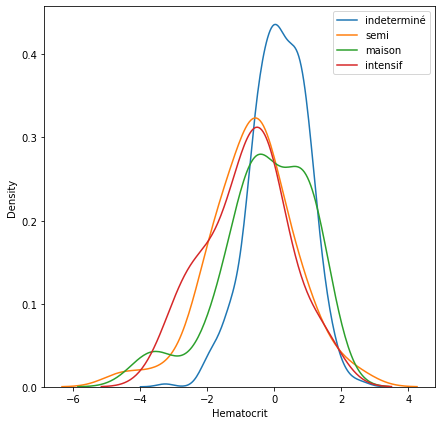

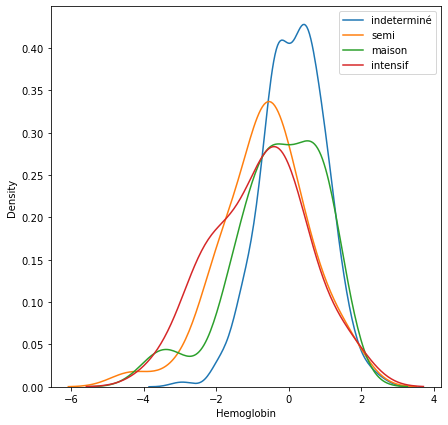

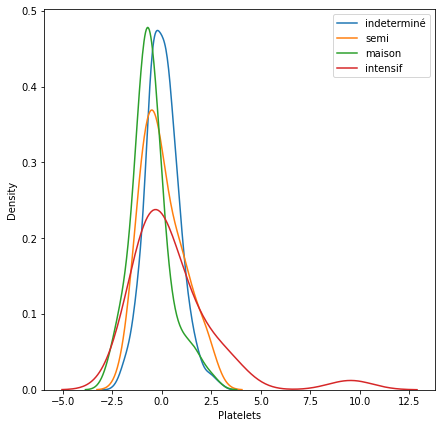

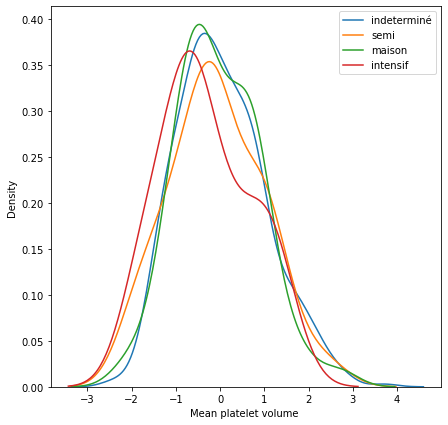

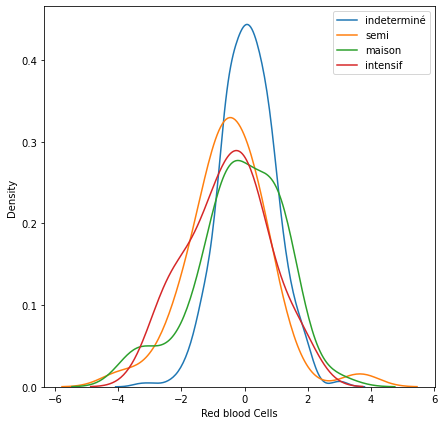

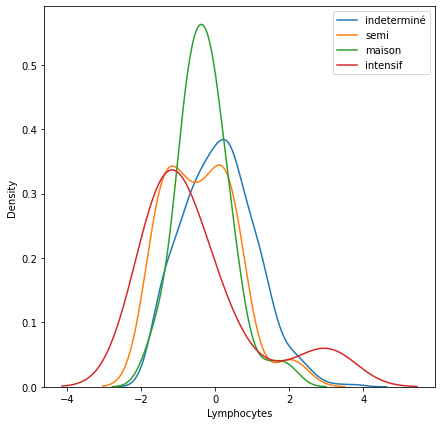

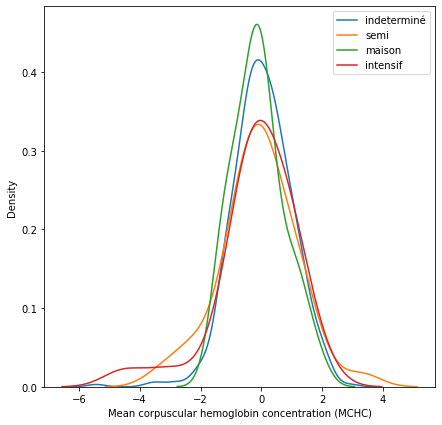

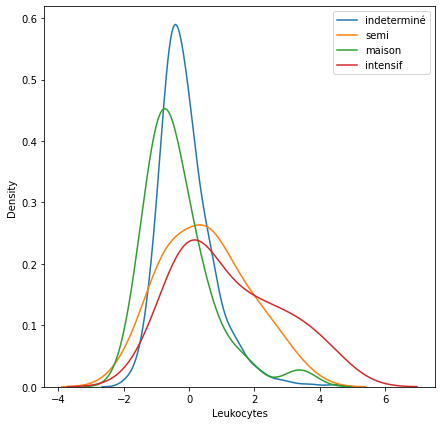

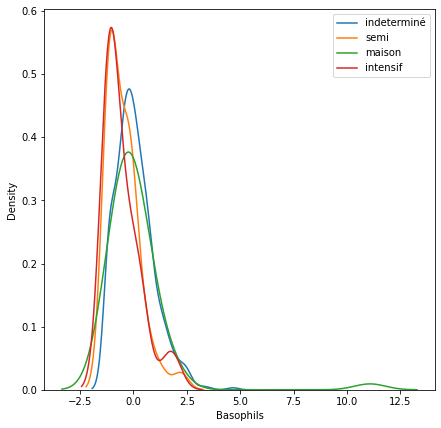

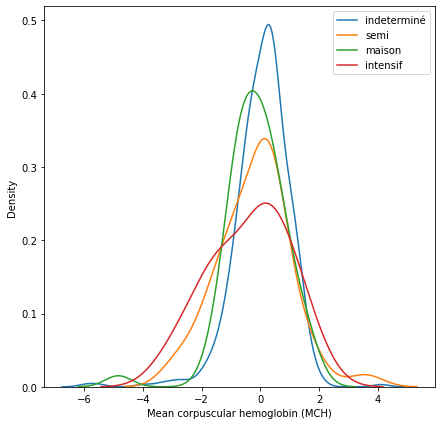

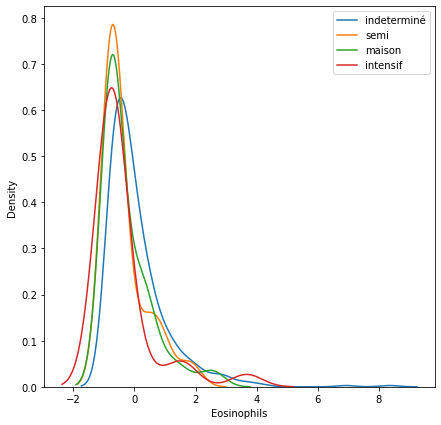

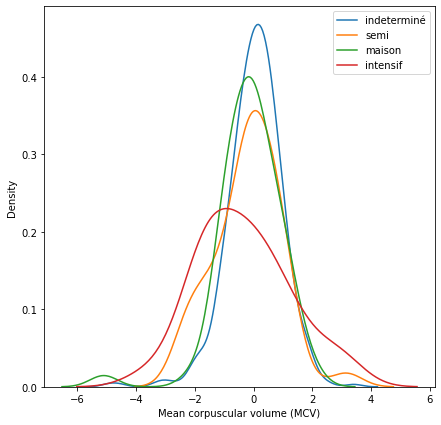

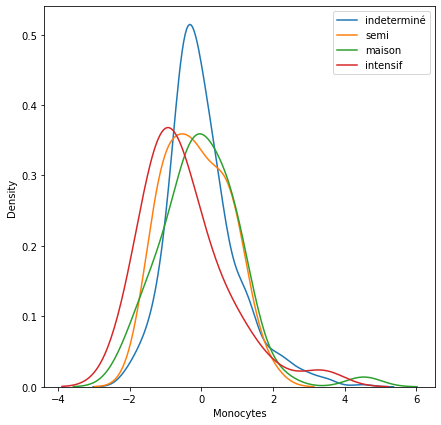

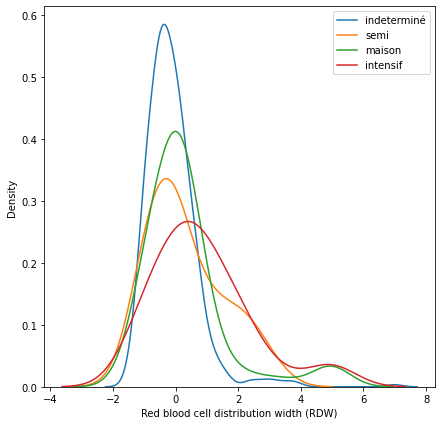

In [31]:
categories=df['hospitalisation?'].unique()

for col in blood_columns:
    plt.figure(figsize=(7,7))
    for cat in categories :
        sns.distplot(df[df['hospitalisation?']==cat][col],label=cat,hist=False)
    plt.legend()

# Optionnel: correlations des variables sanguines entre elles?(kbest et pca?)
(clustermap (mieux que heat map))

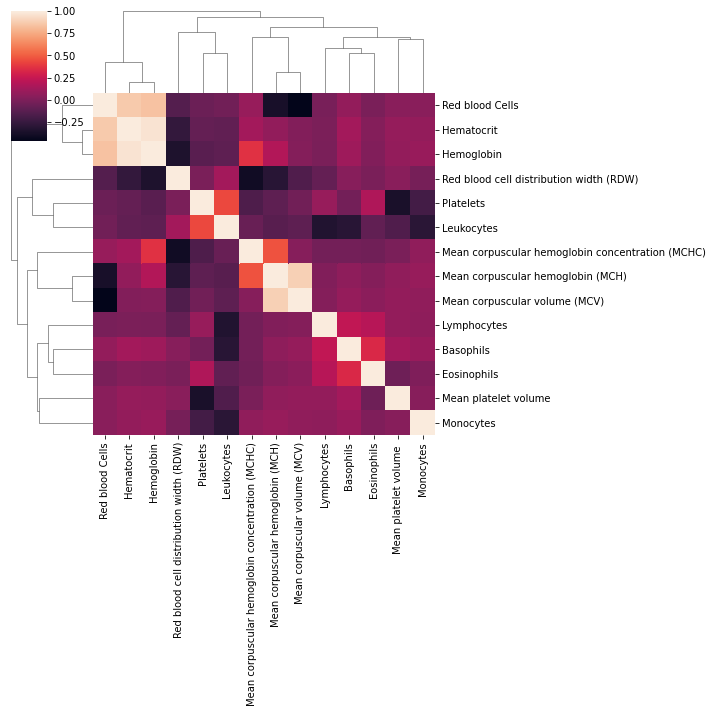

In [32]:
sns.clustermap(blood_columns.corr())

In [111]:
#notes perso
#df.isna().sum()/df.shape[0] <0.9) #serie pandas dans une liste nom colonne +booleen
#df.columns[df.isna().sum()/df.shape[0] <0.9] 
#fonction df.columns à qui on fournit, entre crochets, un tableau de "nom colone"+booleen pour savoir si on la garde 
#et renvoit l'index (liste) des colonnes gardées->tricky
